In [2]:
import time
from scipy.sparse import load_npz
import pandas as pd

from memory_profiler import memory_usage
import gc

from BSP_v2_20231106_Eg_original import granp as granp_old
from BSP_v2_20231106_Eg_new import granp as granp_new_non_cache
from BSP_v2_20231106_Eg import granp as granp_new

# Load your data outside of the benchmarking function
InputFolder = "C:\\Users\\yiqin\\OneDrive\\文档\\github\\BSP_V2\\Data\\"
InputFile2 = InputFolder + "HDST\\HDST_CN24-D1_mouseMOB_metaData.csv"
InputSpData2 = pd.read_csv(InputFile2)
InputSpMat2 = InputSpData2[["pxl_col_in_fullres", "pxl_row_in_fullres"]].to_numpy()
InputExpData2 = load_npz(InputFolder + 'HDST\\HDST_CN24-D1_mouseMOB_expression_spa.npz')

number_of_runs = 50  # Specify the number of times you want to run the function

def benchmark_execution_time(func, args, number_of_runs):
    execution_times = []
    for _ in range(number_of_runs):
        start_time = time.time()
        func(*args)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

def benchmark_memory_usage(func, args, number_of_runs, interval=0.01):  # More frequent sampling
    mem_usages = []
    for _ in range(number_of_runs):
        gc.collect()  # Explicitly run garbage collection
        mem_usage = memory_usage((func, args), max_usage=True, interval=interval)
        mem_usages.append(mem_usage)
    return mem_usages

In [3]:
# Perform the benchmark for execution time
execution_times_old = benchmark_execution_time(granp_old, (InputSpMat2, InputExpData2), number_of_runs)
mem_usages_old  = benchmark_memory_usage(granp_old, (InputSpMat2, InputExpData2), number_of_runs)

execution_times_new = benchmark_execution_time(granp_new, (InputSpMat2, InputExpData2), number_of_runs)
mem_usages_new = benchmark_memory_usage(granp_new, (InputSpMat2, InputExpData2), number_of_runs)

execution_times_new_non_cache = benchmark_execution_time(granp_new_non_cache, (InputSpMat2, InputExpData2), number_of_runs)
mem_usages_new_non_cache = benchmark_memory_usage(granp_new_non_cache, (InputSpMat2, InputExpData2), number_of_runs)

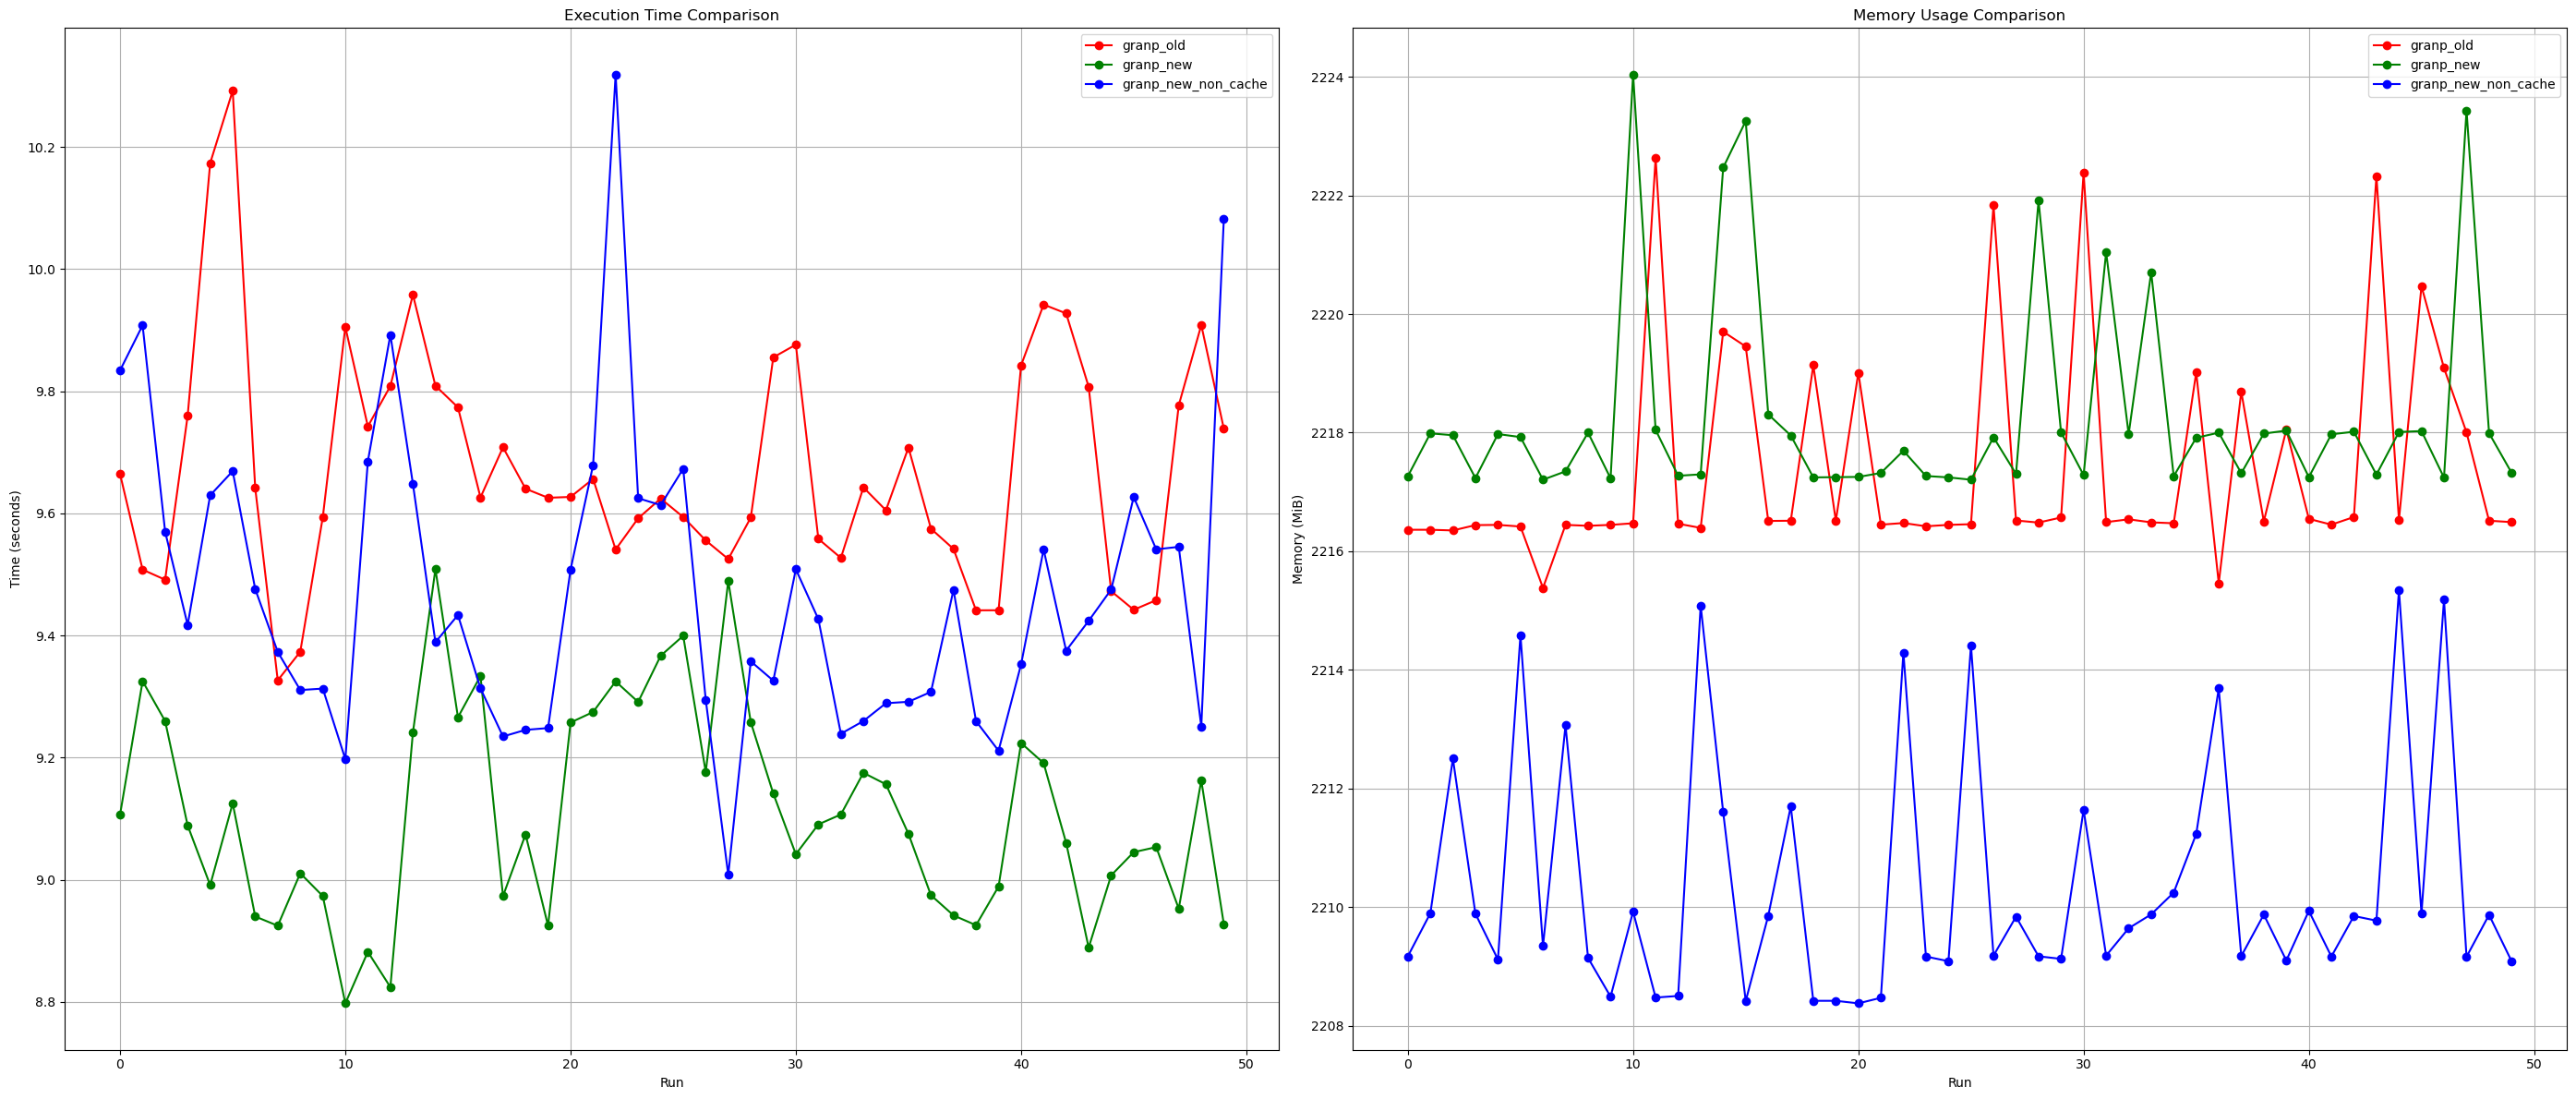

In [6]:
import matplotlib.pyplot as plt

def plot_benchmarks(execution_times_old, execution_times_new, mem_usages_old, mem_usages_new):
    plt.figure(figsize=(28, 12))

    # Plot execution times
    plt.subplot(1, 2, 1)
    plt.plot(execution_times_old, marker='o', linestyle='-', color='r', label='granp_old')
    plt.plot(execution_times_new, marker='o', linestyle='-', color='g', label='granp_new')
    plt.plot(execution_times_new_non_cache, marker='o', linestyle='-', color='b', label='granp_new_non_cache')
    plt.title('Execution Time Comparison')
    plt.xlabel('Run')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)

    # Plot memory usages
    plt.subplot(1, 2, 2)
    plt.plot(mem_usages_old, marker='o', linestyle='-', color='r', label='granp_old')
    plt.plot(mem_usages_new, marker='o', linestyle='-', color='g', label='granp_new')
    plt.plot(mem_usages_new_non_cache, marker='o', linestyle='-', color='b', label='granp_new_non_cache')
    plt.title('Memory Usage Comparison')
    plt.xlabel('Run')
    plt.ylabel('Memory (MiB)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Now plot the benchmark results
plot_benchmarks(execution_times_old, execution_times_new, mem_usages_old, mem_usages_new)